# Yahoo Troll Detection 
## Team: 
### East India Company:<br/>
1) Kaushik Mishra (IMT2020137) <br/>
2) Monjoy Narayan Choudhury (IMT2020502) 
## Problem Statement: 
Detect spam and troll questions so that they can be removed. 
## Given: 
Hand-labeled dataset consisting of questions with unique IDs and whether they are troll questions or not.


## Handling imports 

In [ ]:
!pip install scikit-learn-intelex
from sklearnex import patch_sklearn
# patch_sklearn()

import pandas as pd
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
import nltk 
import pickle
import re 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy import sparse
from sklearn.linear_model import Perceptron
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn import over_sampling
from collections import Counter
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
!pip install spacy-langdetect
!pip install spacy
!pip install googletrans
import spacy
from spacy_langdetect import LanguageDetector
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
import tensorflow as tf
from imblearn.under_sampling import RandomUnderSampler
from googletrans import Translator
import spacy
from nltk.corpus import wordnet as wn
from sklearn.linear_model import SGDClassifier
!pip install gensim==4.2
import gensim
from textblob import TextBlob 
from textblob import Word

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Loading Dataframes

In [ ]:
df_train = pd.read_csv("https://raw.githubusercontent.com/MnCSSJ4x/Yahoo-Troll-Detection-Challenge/main/train_df.csv?token=GHSAT0AAAAAABWVIX4OHL75KBJ6P735MPLKYZ2PMPQ")
df_test = pd.read_csv("https://raw.githubusercontent.com/MnCSSJ4x/Yahoo-Troll-Detection-Challenge/main/test_df.csv?token=GHSAT0AAAAAABWVIX4O5BQNJC6JE6FK77YWYZ2PMNQ")
# df_test = pd.read_csv("https://raw.githubusercontent.com/KMishra23/mlprojectdata/main/test_lemmatised_preprocess.csv")

In [ ]:
df_train.head()

,qid,question_text,target
0,dda0b0efc8ba86e81ec4,What are interesting facts about Microsoft his...,0
1,dc708b74a108d0fc0ad9,What are those things which are not gonna happ...,0
2,06a27ec5d82dacd8bfe0,"What should I know to avoid being ""upsold"" whe...",0
3,00cbb6b17e3ceb7c5358,How I add any account with payment bank?,0
4,7c304888973a701585a0,Which Multi level marketing products are actua...,0


#Preprocessing Steps and Checks
## Data summarisation: 
Checking for null values, duplicate values and so on. 

In [ ]:
print("The number of null values in train set is\n",df_train.isna().sum())
print("The number of null values in test set is\n",df_test.isna().sum())

The number of null values in train set is
 qid              0
question_text    0
target           0
dtype: int64
The number of null values in test set is
 qid              0
question_text    0
dtype: int64


In [ ]:
print("The number of duplicated value in train set is ",df_train.duplicated().sum()) 
print("The number of duplicated value in test set is ",df_test.duplicated().sum()) 
print("The number of duplicated value in train set in question_text is ",df_train.duplicated(subset=['question_text']).sum()) 
print("The number of duplicated value in test set in question_text is ",df_test.duplicated(subset=['question_text']).sum()) 

The number of duplicated value in train set is  0
The number of duplicated value in test set is  0
The number of duplicated value in train set in question_text is  0
The number of duplicated value in test set in question_text is  0


### We noticed that the dataset has no null/ NaN values as well as no duplicated rows as such

## Checking foreign language in the dataframe
from lt onwards misclassification occurs:  <br/>
['th', 'mr', 'ta','el', 'ja', 'vi', 'bn', 'ar', 'ru', 'bg', 'hi', 'unknown', 'zh-cn'] are properly isolated 


In [ ]:
def detect_lang(text):
  try:
    return detect(text)
  except LangDetectException:
    return 'unknown'

In [ ]:
df_train['language'] = df_train['question_text'].apply(detect_lang)

In [ ]:
# df_train.to_csv('train_withlang.csv', index=True)  

In [ ]:
df_train['language'].unique()

array(['en', 'pt', 'cy', 'af', 'id', 'it', 'nl', 'fr', 'tl', 'ro', 'es',
       'et', 'da', 'ca', 'sv', 'no', 'so', 'hr', 'sq', 'fi', 'de', 'pl',
       'sk', 'sl', 'sw', 'tr', 'cs', 'lv', 'hu', 'lt', 'th', 'mr', 'ta',
       'el', 'ja', 'vi', 'bn', 'ar', 'ru', 'bg', 'hi', 'unknown', 'zh-cn'],
      dtype=object)

In [ ]:
df_train[df_train['language'] == 'en']

,qid,question_text,target,language
0,dda0b0efc8ba86e81ec4,What are interesting facts about Microsoft his...,0,en
1,dc708b74a108d0fc0ad9,What are those things which are not gonna happ...,0,en
2,06a27ec5d82dacd8bfe0,"What should I know to avoid being ""upsold"" whe...",0,en
3,00cbb6b17e3ceb7c5358,How I add any account with payment bank?,0,en
4,7c304888973a701585a0,Which Multi level marketing products are actua...,0,en
...,...,...,...,...
999995,4bd96088d0b5f0f2c4f4,How is CSE at VIT Chennai?,0,en
999996,e80edbfc086f7125940f,"How can we prevent a holocaust by robots, AI, ...",0,en
999997,1506dfad6bd340782a1f,How can I help a student remember key steps an...,0,en
999998,b56c60fd407f2f85553c,What is the difference between lace closure & ...,0,en


We will translate the dataframe into all english using google translate package 


In [ ]:
def detect_and_translate(text,target_lang='en'):
    result_lang = detect(text)
    if result_lang == target_lang:
        return text 
    else:
        translator = Translator()  
        translate_text = translator.translate(text,lang_src=result_lang,lang_tgt=target_lang)
        return translate_text 

In [ ]:
df_train['question_text'] = df_train['question_text'].apply(lambda x: detect_and_translate(x))

TypeError: ignored

In [ ]:
# Number of words
df_train['num_words'] = df_train['question_text'].apply(lambda x: len(str(x).split()))
df_test['num_words'] = df_test['question_text'].apply(lambda x: len(str(x).split()))

# Number of capital_letters
df_train['num_capital_let'] = df_train['question_text'].apply(lambda x: len([c for c in str(x) if c.isupper()]))
df_test['num_capital_let'] = df_test['question_text'].apply(lambda x: len([c for c in str(x) if c.isupper()]))

# Number of special characters
df_train['num_special_char'] = df_train['question_text'].str.findall(r'[^a-zA-Z0-9 ]').str.len()
df_test['num_special_char'] = df_test['question_text'].str.findall(r'[^a-zA-Z0-9 ]').str.len()

# Number of unique words
df_train['num_unique_words'] = df_train['question_text'].apply(lambda x: len(set(str(x).split())))
df_test['num_unique_words'] = df_test['question_text'].apply(lambda x: len(set(str(x).split())))

# Number of numerics
df_train['num_numerics'] = df_train['question_text'].apply(lambda x: sum(c.isdigit() for c in x))
df_test['num_numerics'] = df_test['question_text'].apply(lambda x: sum(c.isdigit() for c in x))

# Number of characters
df_train['num_char'] = df_train['question_text'].apply(lambda x: len(str(x)))
df_test['num_char'] = df_test['question_text'].apply(lambda x: len(str(x)))

# Number of stopwords
df_train['num_stopwords'] = df_train['question_text'].apply(lambda x: len([c for c in str(x).lower().split() if c in STOPWORDS]))
df_test['num_stopwords'] = df_test['question_text'].apply(lambda x: len([c for c in str(x).lower().split() if c in STOPWORDS]))

In [ ]:
df_train.head()

,qid,question_text,target,num_words,num_capital_let,num_special_char,num_unique_words,num_numerics,num_char,num_stopwords
0,dda0b0efc8ba86e81ec4,What are interesting facts about Microsoft his...,0,7,2,1,7,0,51,3
1,dc708b74a108d0fc0ad9,What are those things which are not gonna happ...,0,10,1,1,9,0,54,6
2,06a27ec5d82dacd8bfe0,"What should I know to avoid being ""upsold"" whe...",0,14,2,3,14,0,78,7
3,00cbb6b17e3ceb7c5358,How I add any account with payment bank?,0,8,2,1,8,0,40,4
4,7c304888973a701585a0,Which Multi level marketing products are actua...,0,9,2,1,9,0,67,2


In [ ]:
print("Minimum length of a question:", min(df_train['num_words']))
print("Maximum length of a question:", max(df_train['num_words']))

Minimum length of a question: 1
Maximum length of a question: 134


# Visualisations
## Output value frequency plot 


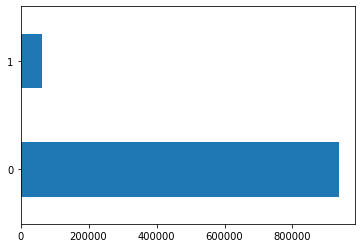

In [ ]:
df_train['target'].value_counts().plot(kind="barh")

This frequency plot tells us that the data is highly oriented towards not trolling so we will need to handle the bias in the data carefully. 

## Word Clouds 
Word clouds can act as a summariser. The bigger and bolder means its mentioned more or appears more in the dataframe 

In [ ]:
## Template function for wordclouds found online ##
def wordcloud_generator(text, mask=None, max_words=2000, max_font_size=50, figure_size=(12.0,8.0), 
                   title = None, title_size=20, image_color=False):
    stop_words = set(stopwords.words("english"))

    wordcloud = WordCloud(background_color='black',
                    stopwords = stop_words,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=600, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud);
    plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                              'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    


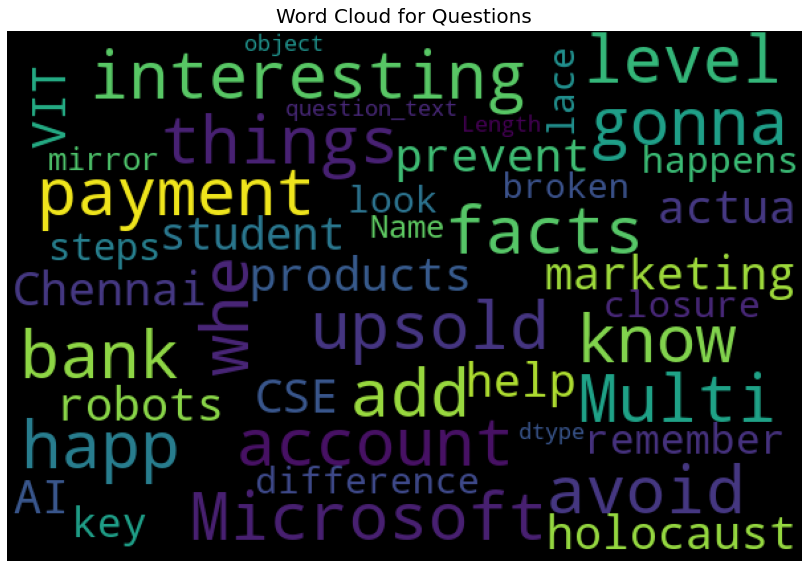

In [ ]:
wordcloud_generator(df_train["question_text"], title="Word Cloud for Questions")

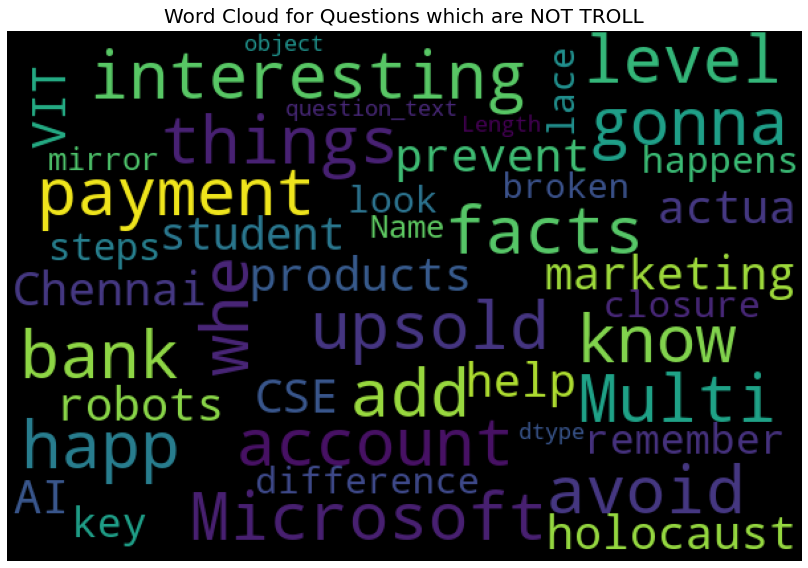

In [ ]:
wordcloud_generator(df_train[df_train["target"]==0]["question_text"], title="Word Cloud for Questions which are NOT TROLL")

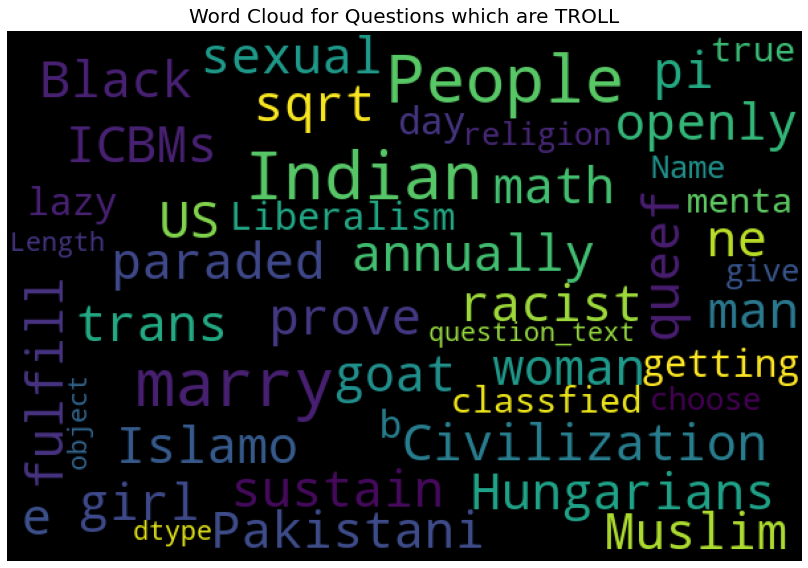

In [ ]:
wordcloud_generator(df_train[df_train["target"]==1]["question_text"], title="Word Cloud for Questions which are TROLL")

## Word Frequency Plot

Reference: https://towardsdatascience.com/very-simple-python-script-for-extracting-most-common-words-from-a-story-1e3570d0b9d0

In [ ]:
class WordFreq:
  def get_unigrams(self,data):
    unigrams = []
    for sent in data:
      unigrams.extend([w for w in sent.lower().split() if w not in STOPWORDS])
    return unigrams

  def get_bigrams(self,data):
    bigrams = []
    for sent in data:
      sent = [w for w in sent.lower().split() if w not in STOPWORDS]
      bi = [b for b in nltk.bigrams(sent)]
      bi = [' '.join(w) for w in bi]
      bigrams.extend(bi)
    return bigrams
    
  def get_trigrams(self,data):
    trigrams = []
    for sent in data:
      sent = [w for w in sent.lower().split() if w not in STOPWORDS]
      ti = [t for t in nltk.trigrams(sent)]
      ti = [' '.join(w) for w in ti]
      trigrams.extend(ti)
    return trigrams
  def plot_word_freq(self,data, title, bar_color):
    top_words = Counter(data).most_common(25) #top 25 words
    df_top = pd.DataFrame(top_words, columns=['word', 'count']).sort_values('count') # storing in df
    plt.barh(df_top['word'].values, df_top['count'].values, orientation='horizontal', color=bar_color) # plot
    plt.title(f'Top words in {title}')
  

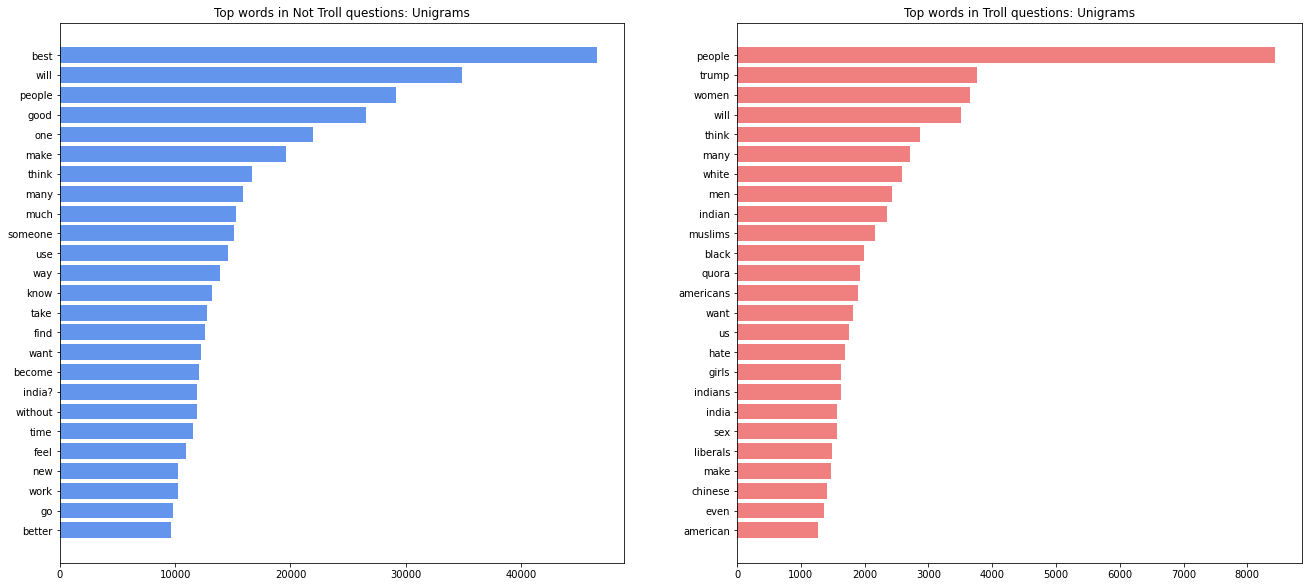

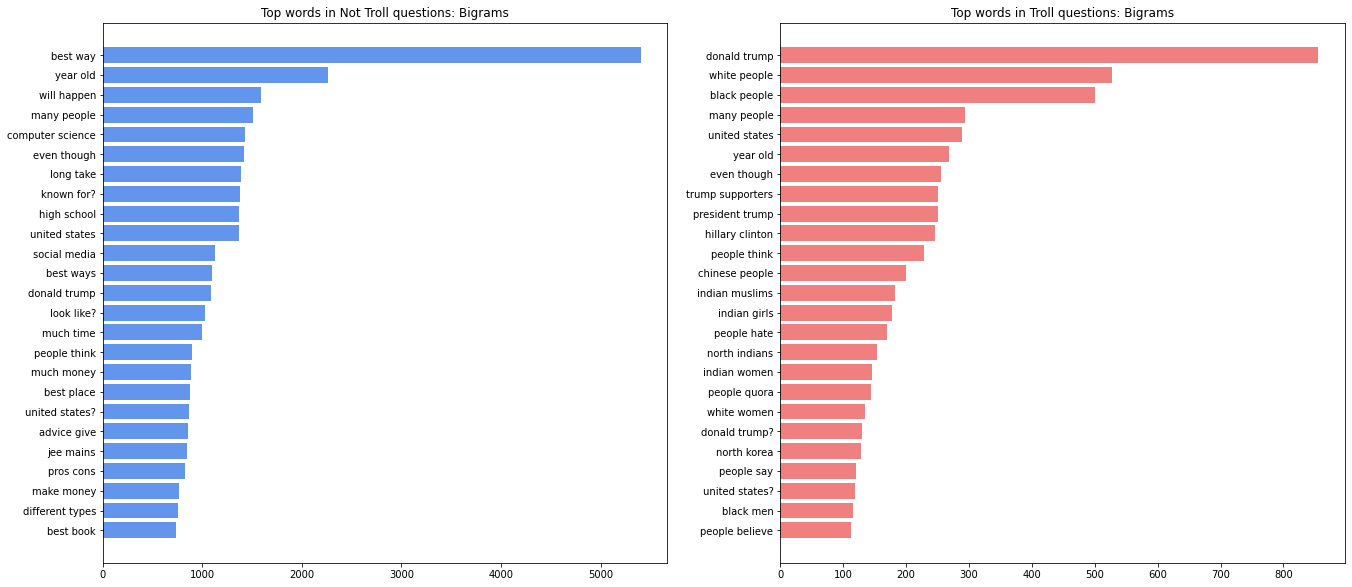

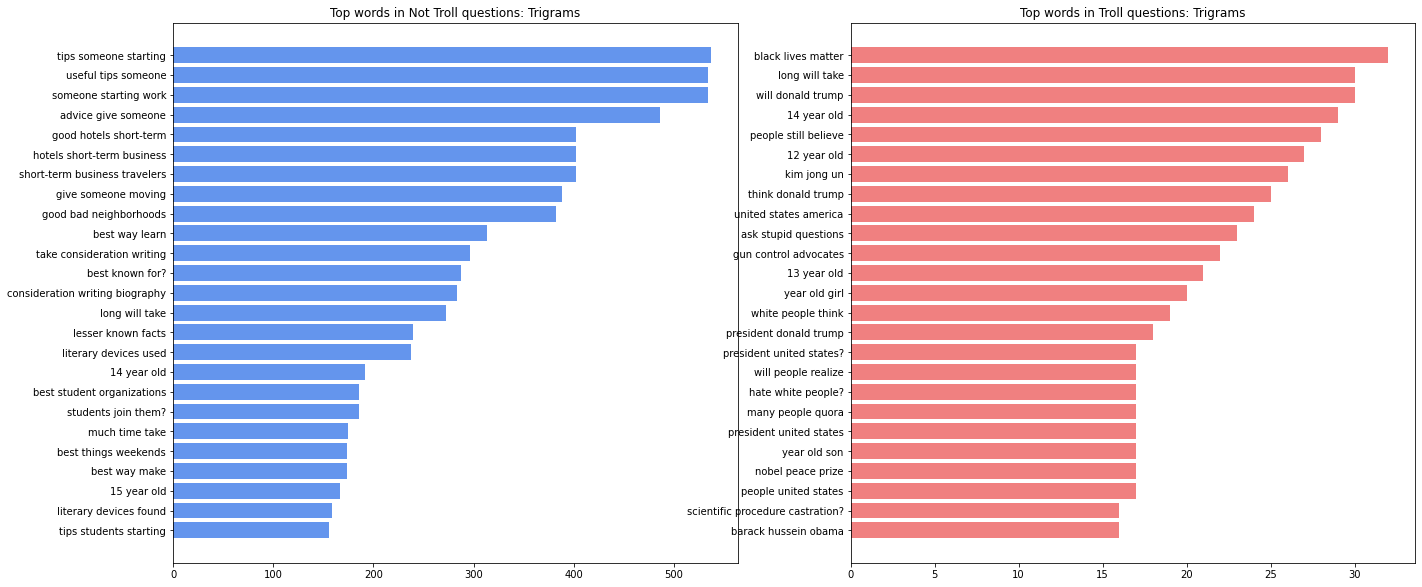

In [ ]:
wf = WordFreq()
unigrams_0  = wf.get_unigrams(df_train[df_train['target']==0]['question_text'])
unigrams_1 = wf.get_unigrams(df_train[df_train['target']==1]['question_text'])

# Bigrams
bigrams_0 = wf.get_bigrams(df_train[df_train['target']==0]['question_text'])
bigrams_1 = wf.get_bigrams(df_train[df_train['target']==1]['question_text'])

# Trigrams
trigrams_0 = wf.get_trigrams(df_train[df_train['target']==0]['question_text'])
trigrams_1 = wf.get_trigrams(df_train[df_train['target']==1]['question_text'])

# Unigrams NOT TROLL words
plt.subplot(1, 2, 1)
wf.plot_word_freq(unigrams_0, 'Not Troll questions: Unigrams', 'cornflowerblue')

# Unigrams TROLL words
plt.subplot(1, 2, 2)
wf.plot_word_freq(unigrams_1, 'Troll questions: Unigrams', 'lightcoral')
plt.subplots_adjust(right=3.0)
plt.subplots_adjust(top=2.0)
plt.show()

# Bigrams NOT TROLL words
plt.subplot(1, 2, 1)
wf.plot_word_freq(bigrams_0, 'Not Troll questions: Bigrams', 'cornflowerblue')

# Bigrams TROLL words
plt.subplot(1, 2, 2)
wf.plot_word_freq(bigrams_1, 'Troll questions: Bigrams', 'lightcoral')
plt.subplots_adjust(right=3.0)
plt.subplots_adjust(top=2.0)
plt.show()

# Trigrams NOT TROLL words
plt.subplot(1, 2, 1)
wf.plot_word_freq(trigrams_0, 'Not Troll questions: Trigrams', 'cornflowerblue')

# Trigrams TROLL words
plt.subplot(1, 2, 2)
wf.plot_word_freq(trigrams_1, 'Troll questions: Trigrams', 'lightcoral')
plt.subplots_adjust(right=3.0)
plt.subplots_adjust(top=2.0)
plt.show()

### Boxplots for constructed features

In [ ]:
def display_boxplot(x, y, data, title):
    sns.boxplot(x=x, y=y, data=data)
    plt.grid(True)
    plt.title(title)

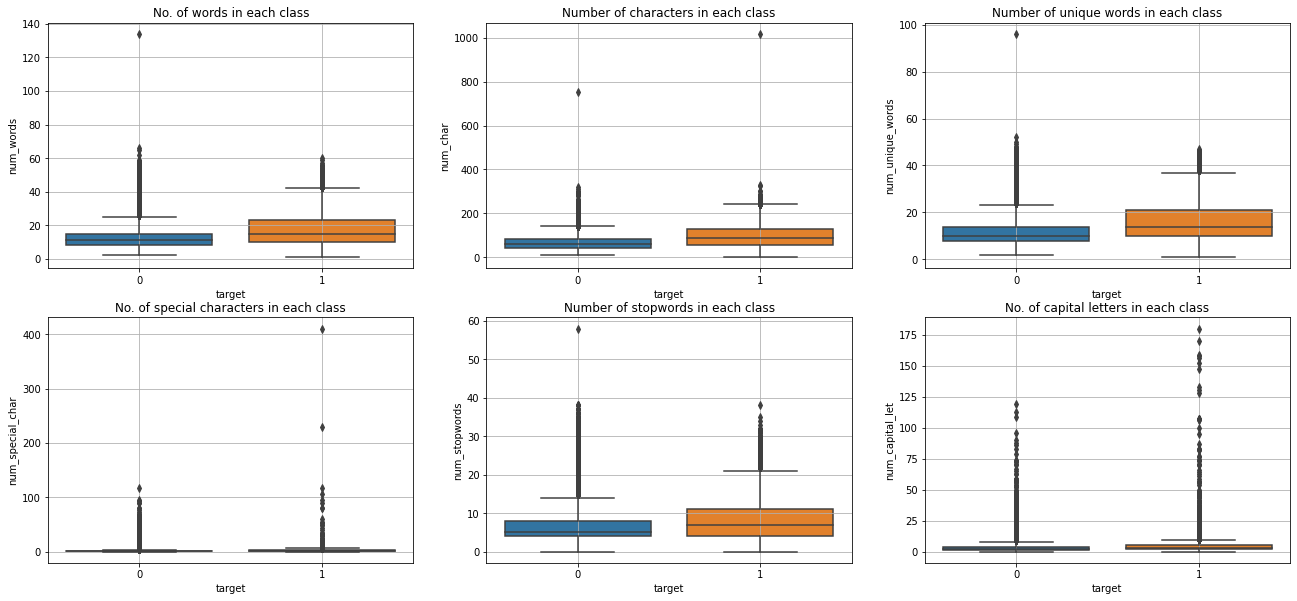

In [ ]:
# Boxplot: Number of words
plt.subplot(2, 3, 1)
display_boxplot('target', 'num_words', df_train, 'No. of words in each class')

# Boxplot: Number of chars
plt.subplot(2, 3, 2)
display_boxplot('target', 'num_char', df_train, 'Number of characters in each class')

# Boxplot: Number of unique words
plt.subplot(2, 3, 3)
display_boxplot('target', 'num_unique_words', df_train, 'Number of unique words in each class')

# Boxplot: Number of special characters
plt.subplot(2, 3, 4)
display_boxplot('target', 'num_special_char', df_train, 'No. of special characters in each class')

# Boxplot: Number of stopwords
plt.subplot(2, 3, 5)
display_boxplot('target', 'num_stopwords', df_train, 'Number of stopwords in each class')

# Boxplot: Number of capital letters
plt.subplot(2, 3, 6)
display_boxplot('target', 'num_capital_let', df_train, 'No. of capital letters in each class')


plt.subplots_adjust(right=3.0)
plt.subplots_adjust(top=2.0)
plt.show()

### Correlation Matrix among constructed features 

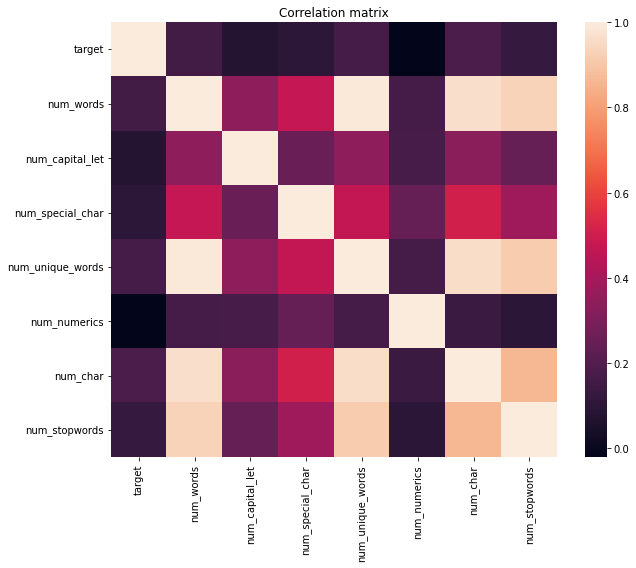

In [ ]:
_,ax = plt.subplots(figsize=(10, 8))
corr = df_train.corr()
sns.heatmap(corr, ax=ax)
plt.title("Correlation matrix")
plt.show()

In [ ]:
def extract_symbols(data):
  symbols = []
  for text in data:
    s = re.findall(r'\W+', str(text))
    symbols.extend(s), 
  return set(symbols)

In [ ]:
extracted_symbols = extract_symbols(df_train['question_text'].values)
print(extracted_symbols)
#tfidf -> ngram = 1,4 -> l2 -> classweight balanced -> 

{'.', ': |', '. "…', ')+ ', ')]? ', 'ो", ', '™. ', ' => ', '})}{\\', '} \\; \\', '̸̧̭̩̯̲̻̺̳̥͇̼̈͊̀̔̈̈́̅͊̎̿̀̔͛͒̿ͅ', ' ( ', '}<\\', " ,''", ' {{\\', ' (|', '-," "', '--?', ' #?', '+/- ', ' “[', '"×', "-'", '(?) ', '>>', '"…?', ' = (?) ^', '{(|', '%" ', ' \uf02d ', '!)^{', ') ∩ (', '±√', '₹…', '″ ', 'ँ"?', '̷̛̭̼̃̐̐̄̌͂͌̾͊̂̈́͜', '▾?', ' ??)', '{ \\', ')}-', ' …', '] ( (', ' ?"?', '≥', '+…\\', ' } \\! \\, \\', "]'", ' (', 'ిం', '+/', ' )[/', '?". ', "ी'?", ') +…)?', '= ', '++', '." (', 'ाँ", ', '…”. ', '].” ', ' /= ', '-? ', ') | >', "!'", '" \\', ')); ', ') / (|', '}) ^', '>) ', '**', '))) +…?', '+…+ (', ']; ', '#" ', '+. ', '------', ']{', '- + ', '}}) [/', '$? ', '>"?', ' - ×-=+?', '~)?', '">', ', ≠ ', '%)', '^+}', '.? "', ' /> ', ' (#', '.?)?', ', . ', ')}}{', ',” “', '()->', '+’. ', '))) = ?', ' "…"? ', '\u200b', '̃], [', ') + \\', ', ', ' -"', 'ើ', ': : ', '}}^{', '>? ', ' -∞ ', ' ” ', '+[', '✓', ' $ |', '//:', '/&/', ')}\\}', '.. ?', 'ा"? ', ' "&" (', '" -- ', '⋅°', '//', " ') ", '! =?',

The text seems to contain a lot of special characters, mathematical equations (which are classified as troll) and emojis too. We feel now that keeping punctuations would be a better move then removing them 

# Building a pre-proceesing class 
Preprocessing of documents occur a bit differently than we have done so far in the course. To ease this process, we have built a preprocessor class which consist of 2 major chunks: Level 1 preprocessing and Level 2 preprocessing. Level 1 consist the likes of: <br/>


*   Lower case conversion ( A->a )
* Punctuation removal (, .) 
*   Stop word removal ( is, shan't, will, shouldn't ...)
*   White space removal 
*   Number removal (still skeptical whether to do this) 
*   URL removal 
* Tokkenization 
*   Stemming (various types/ stemmers)
* Lemmentization 

While Level 2 consist of: 
* Bag of Words 
* TF-IDF 
* Word2Vec 

In [ ]:
class Preprocessor:
  #LEVEL 1 
  def __init__(self,df):
    self.df = df 
  def convertLowercase(self):
    self.df['question_text'] = self.df['question_text'].apply(lambda x: x.lower())
    return self.df
  def removePunctuations(self):
    self.df['question_text'] = self.df['question_text'].apply(lambda x: re.sub(r'[^\w\s]','',x))
    return self.df 
  def removeStopWords(self):
    sw = stopwords.words("english")
    self.df['question_text'] = self.df['question_text'].apply(
        lambda x: " ".join([w for w in x.split() if w not in sw])
    )
    return self.df 
  def removeWhiteSpace(self):
    self.df['question_text'] = self.df['question_text'].apply(
        lambda x: " ".join(x.split())
    )
    return self.df 
  def removeNumericals(self):
    self.df['question_text'] = self.df['question_text'].apply(
        lambda x: re.sub(r'[0-9]','',x))
    return self.df 
  def removeURL(self):
    self.df['question_text'] = self.df['question_text'].apply(
        lambda x: re.sub(r'http\S+', '', x))
    return self.df 
  def tokkenize(self):
    self.df["question_text"] = self.df["question_text"].apply(
        lambda x: x.split()
    )
    return self.df
  def stemmer(self,text,stem_object):
    return " ".join([stem_object.stem(word) for word in text.split()])
  def porterstemmer(self):
    ps = PorterStemmer()
    self.df["question_text"] = self.df["question_text"].apply(
        lambda x: self.stemmer(x,ps)
    )
    return self.df 
  def lemmatize(self):
    nlp = spacy.load('en_core_web_sm')
    self.df["question_text"] = self.df["question_text"].apply(
         lambda row: " ".join([w.lemma_ for w in nlp(row)])
    )

    # wnl = WordNetLemmatizer()
    # self.df["question_text"] = self.df["question_text"].apply(
    #    lambda t: wnl.lemmatize(w) for w in t
    # )
    return self.df
  def spell_correct(self):
    self.df['question_text'] = self.df['question_text'].apply(lambda x: ''.join(TextBlob(x).correct()))
    return self.df 
  def preprocess(self):
    # self.df = self.convertLowercase()
    # self.df = self.removeStopWords()
    # self.df = self.removePunctuations()
    # self.df = self.removeURL()
    # self.df = self.removeWhiteSpace()
    # self.df = self.PorterStemmer()
    # self.df = self.tokkenize()
    # self.df = self.spell_correct()
    return self.df 

Applying all the preprocessing defined in part 1 

In [ ]:
preprocessor_train = Preprocessor(df_train)
processed_df  = preprocessor_train.preprocess()

In [ ]:
preprocessor_test = Preprocessor(df_test)
processed_test_df = preprocessor_test.preprocess()

In [ ]:
type(processed_df)

pandas.core.frame.DataFrame

In [ ]:
processed_df.head(10)

,qid,question_text,target
0,dda0b0efc8ba86e81ec4,What are interesting facts about Microsoft his...,0
1,dc708b74a108d0fc0ad9,What are those things which are not gonna happ...,0
2,06a27ec5d82dacd8bfe0,"What should I know to avoid being ""upsold"" whe...",0
3,00cbb6b17e3ceb7c5358,How I add any account with payment bank?,0
4,7c304888973a701585a0,Which Multi level marketing products are actua...,0
5,ea4cd303008998c57ac3,What scope would you recommend for a Remington...,0
6,a035227a3a8285020eee,Can Black People sustain Civilization?,1
7,5001c9fd191100408241,"What city is better, Des Moines or Omaha?",0
8,1089c5764a9b654be4a1,How do you thicken stir fry sauce?,0
9,eb4c50276503ee3d71aa,Can a woman squirt if just rubbing the clit ge...,0


We will export this preprocessed dataset and store locally for the ease of working for the 2 members. 

In [ ]:
processed_df.to_csv('train_preprocess.csv', index=True)  

In [ ]:
processed_test_df.to_csv('test_lemmatised_preprocess.csv', index=True)

In [ ]:
processed_df = pd.read_csv("https://raw.githubusercontent.com/MnCSSJ4x/Yahoo-Troll-Detection-Challenge/main/train_preprocess.csv")
processed_df['question_text']=processed_df['question_text'].values.astype(str)
# processed_df = df_train
# processed_df = pd.read_csv("https://raw.githubusercontent.com/KMishra23/mlprojectdata/main/lemmatized_preprocess_train.csv")

KeyboardInterrupt: ignored

In [ ]:
# detect_lang()

'en'

In [ ]:
processed_df.head()

,qid,question_text,target
0,dda0b0efc8ba86e81ec4,What are interesting facts about Microsoft his...,0
1,dc708b74a108d0fc0ad9,What are those things which are not gonna happ...,0
2,06a27ec5d82dacd8bfe0,"What should I know to avoid being ""upsold"" whe...",0
3,00cbb6b17e3ceb7c5358,How I add any account with payment bank?,0
4,7c304888973a701585a0,Which Multi level marketing products are actua...,0


In [ ]:
print("The number of null values in train set is\n",processed_df.isna().sum())
# print("The number of null values in test set is\n",df_test.isna().sum())

The number of null values in train set is
 Unnamed: 0       0
qid              0
question_text    0
target           0
dtype: int64


In [ ]:
processed_df = processed_df.dropna()

In [ ]:
X = processed_df['question_text']
Y = processed_df['target']

In [ ]:
X

0         What are interesting facts about Microsoft his...
1         What are those things which are not gonna happ...
2         What should I know to avoid being "upsold" whe...
3                  How I add any account with payment bank?
4         Which Multi level marketing products are actua...
                                ...                        
999995                           How is CSE at VIT Chennai?
999996    How can we prevent a holocaust by robots, AI, ...
999997    How can I help a student remember key steps an...
999998    What is the difference between lace closure & ...
999999     What happens when you look into a broken mirror?
Name: question_text, Length: 1000000, dtype: object

In [ ]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
999995    0
999996    0
999997    0
999998    0
999999    0
Name: target, Length: 1000000, dtype: int64

In [ ]:
Counter(Y)

Counter({0: 938130, 1: 61870})

In [ ]:
# np.reshape(X, (X.shape[0], 1)).shape
X.to_numpy().shape

(1000000,)

For the 2nd level of pre-processing, initially we will go with a Bag of Words approach using the Count Vectorizer.

We notice that for max_features=5000 and onwards collab crashes even with GPU runtime. So we kept it limited till 300 for now 

## Train-Test Split 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,  stratify=Y)

In [ ]:
X_train = X
y_train = Y

### TF-IDF Vectorizer

W/O Stacking

In [ ]:
vectorize = TfidfVectorizer(
    strip_accents = 'unicode',
    analyzer = 'word',
    ngram_range = (1, 3),
    # max_df = 0.5,
    max_features = 150000,
)
# vectorize.fit()
X_train = vectorize.fit_transform(X_train)
X_test = vectorize.transform(X_test)

With Stacking

In [ ]:
# vectorize = TfidfVectorizer(ngram_range=(1,4),lowercase=False, analyzer="char")
# X_train_1 = vectorize.fit_transform(X_train)
# X_test_1 = vectorize.transform(X_test)

In [ ]:
# vectorize = TfidfVectorizer(ngram_range=(1,4),lowercase=False, analyzer="word")
# X_train_2 = vectorize.fit_transform(X_train)
# X_test_2 = vectorize.transform(X_test)

In [ ]:
# X_train = np.hstack((X_train_1, X_train_2))

### Count Vectorizer (Simple Bag of Words)

In [ ]:
vectorize = CountVectorizer(ngram_range=(1,4))
X_train = vectorize.fit_transform(X_train)
X_test = vectorize.transform(X_test)

In [ ]:
# X_test = vectorize.transform(X_test)

NotFittedError: ignored

In [ ]:
type(X_train)

### Word2Vec


In [ ]:
model = gensim.models.Word2Vec(window=10,min_count=2,workers=4)
model.build_vocab(processed_df['question_text'],progress_per=1000)
model.train(processed_df['question_text'],total_examples=model.corpus_count,epochs=model.epochs)

(31130088, 32438780)

In [ ]:
model.save('yahoo-troll.model')

In [ ]:
model.wv.most_similar("gay")

[('lesbian', 0.8294651508331299),
 ('bisexual', 0.7962446808815002),
 ('homosexual', 0.7914692163467407),
 ('transgender', 0.7721728682518005),
 ('incest', 0.7534871697425842),
 ('gays', 0.7509098052978516),
 ('heterosexual', 0.7465698719024658),
 ('trans', 0.7289459705352783),
 ('lesbians', 0.7220199704170227),
 ('lgbt', 0.713936448097229)]

In [ ]:
gensim.__version__

'4.2.0'

In [ ]:
w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=5,
                                   min_count=2)
words = set(w2v_model.wv.index_to_key )
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_test])
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':


For test,
run after training

In [ ]:
preprocessor_train = Preprocessor(df_test)
processed_df  = preprocessor_train.preprocess()
X_test = df_test['question_text']
X_actual_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_test])
X_actual_test_vect_avg = []
for v in X_actual_test_vect:
    if v.size:
        X_actual_test_vect_avg.append(v.mean(axis=0))
    else:
        X_actual_test_vect_avg.append(np.zeros(100, dtype=float))

y_pred = lr.predict(X_actual_test_vect_avg)
y_pred = pd.DataFrame(y_pred, columns=['target'])
submission = pd.concat([df_test, y_pred], axis = 1).drop(columns=['question_text'])
submission.to_csv('submission_LR_oversample.csv', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


## Sampling for imabalanced Dataset 

### Undersampling 

In [ ]:
# summarize class distribution
counter = Counter(y_train)
print(counter)
# define the undersampling method
undersample = RandomUnderSampler()
# transform the dataset
X_undersample, y_undersample = undersample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_undersample)
print(counter)

Counter({0: 656691, 1: 43309})
Counter({0: 43309, 1: 43309})


In [ ]:
oversample = over_sampling.RandomOverSampler()
X_oversample, y_oversample = oversample.fit_resample(X_train, y_train)

In [ ]:
counter = Counter(y_oversample)
print(counter)

Counter({0: 656691, 1: 656691})


### Oversampled TTS

### SMOTE

In [ ]:
sm = SMOTE()
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train.ravel())

### Undersampling


# Visualisation aid:
We are planning to use a confusion matrix to see how the predictions change. Below is a helper method which aids in this

In [ ]:
def plot_confusion_matrix(cm):
  fig, ax = plt.subplots()
  sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
  ax.set(xlabel="Pred", ylabel="True", xticklabels=["Not Troll","Troll"], 
       yticklabels=["Not Troll","Troll"], title="Confusion matrix")
  plt.yticks(rotation=0)

# For Test Predictions


In [ ]:
def test_predict(df_test,clf,vectorize):
  preprocessor_train = Preprocessor(df_test)
  processed_df  = preprocessor_train.preprocess()
  X = processed_df['question_text']
  # df_test = df_test.dropna()
  X = df_test['question_text']
  X = vectorize.transform(X)
  y_pred = clf.predict(X)
  y_pred = pd.DataFrame(y_pred, columns=['target'])
  submission = pd.concat([df_test, y_pred], axis = 1).drop(columns=['question_text'])
  submission.to_csv('submission_LR.csv', index=False)  

#A trial of Models 
Initially we are planning to try out models like Multivaraite Naive Bayes, Logistic Regression with cross-validation and hyper-parameter tuning wherever applicable. 

## Naive Bayes Multinomial 
The result below give 93% however this is poor (if not garbage) as the model is always detecting not troll. The f1-score for class 1 is 0.35 which is pretty bad. This is due to the imbalanced dataset which we have. We will have to do sampling or smart hyper-parameter selection for the other models we can use. 

### No Balancing of dataset

[[277342   4097]
 [ 11268   7293]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    281439
           1       0.64      0.39      0.49     18561

    accuracy                           0.95    300000
   macro avg       0.80      0.69      0.73    300000
weighted avg       0.94      0.95      0.94    300000



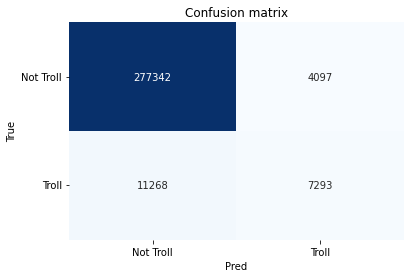

In [ ]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

In [ ]:
test_predict(df_test,clf,vectorize)

### SMOTE

[[253950  27489]
 [  5209  13352]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94    281439
           1       0.33      0.72      0.45     18561

    accuracy                           0.89    300000
   macro avg       0.65      0.81      0.69    300000
weighted avg       0.94      0.89      0.91    300000



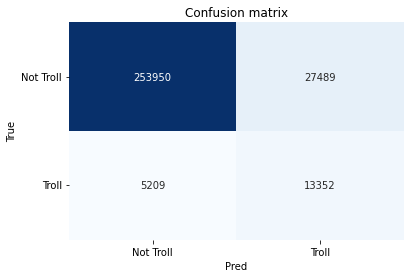

In [ ]:
clf = MultinomialNB()
clf.fit(X_train_smote, y_train_smote)
y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

### Oversampled Dataset

[[249926  31513]
 [  2746  15815]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94    281439
           1       0.33      0.85      0.48     18561

    accuracy                           0.89    300000
   macro avg       0.66      0.87      0.71    300000
weighted avg       0.95      0.89      0.91    300000



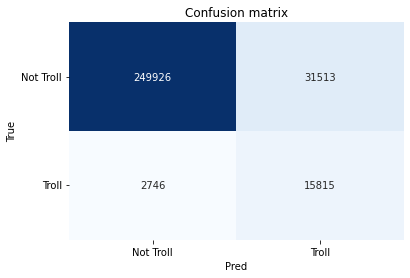

In [ ]:
clf = MultinomialNB()
clf.fit(X_over_train, y_over_train)
y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

[[195769  85670]
 [   822  17739]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.82    281439
           1       0.17      0.96      0.29     18561

    accuracy                           0.71    300000
   macro avg       0.58      0.83      0.55    300000
weighted avg       0.94      0.71      0.79    300000



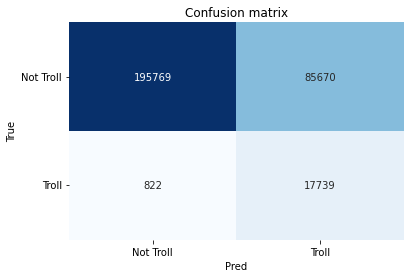

In [ ]:
clf = MultinomialNB()
clf.fit(X_undersample, y_undersample)
y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

## Logistic Regression 
We will apply cross-validation with hyper-parameter tuning so that we can use regularisation and also weights parameter which can help us to handle the imbalanced dataset 

In [ ]:
model = LogisticRegression(max_iter=500, class_weight="balanced",C=0.5,dual=False,solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

[[182426   5200]
 [  4108   8266]]


NameError: ignored

In [ ]:
import pickle
pickle.dump(model, open('lr.pkl', 'wb'))

In [ ]:
# import pickle
# model = pickle.load(open('lr.pkl','rb'))
# y_pred = model.predict(X_test)

ValueError: ignored

In [ ]:
y_pred_df=pd.DataFrame(y_pred,index=y_test.index)

In [ ]:
y_pred_df!=y_test

In [ ]:
model = LogisticRegression(max_iter=500, class_weight="balanced",C=0.5,dual=False,solver='lbfgs')
model.fit(X_train, y_train)
def custom_predict(X, threshold):
    probs = model.predict_proba(X) 
    return (probs[:, 1] > threshold).astype(int)
y_pred = custom_predict(X=X_test, threshold=0.35)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

[[180214   7412]
 [  3509   8865]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97    187626
           1       0.54      0.72      0.62     12374

    accuracy                           0.95    200000
   macro avg       0.76      0.84      0.79    200000
weighted avg       0.95      0.95      0.95    200000



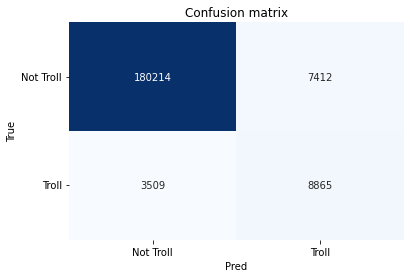

In [ ]:
model = LogisticRegression(max_iter=500, class_weight={0:0.3,1:0.7})
model.fit(X_train, y_train)
def custom_predict(X, threshold):
    probs = model.predict_proba(X) 
    return (probs[:, 1] > threshold).astype(int)
y_pred = custom_predict(X=X_test, threshold=0.35)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

### Grid Search CV

In [ ]:
lr = LogisticRegression(max_iter=1000)
param = [{
    'penalty': ['l2'],
    'C':[1,1.5,2,5,10],
    'class_weight': ['balanced']
}]
# param = [{
#     'penalty': ['elasticnet'],
#     'C':[1,1.5,2,5,10],
#     'class_weight': ['balanced']
# }]
# param = [{
#     'penalty': ['elasticnet'],
#     'C':[1],
#     'class_weight': ['balanced']
# }]
grid_cv = GridSearchCV(lr,param,scoring="f1")
grid_cv.fit(X_train,y_train)
y_pred = grid_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

In [ ]:
grid_cv.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 16.5min finished


[[185502   2124]
 [  6797   5577]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    187626
           1       0.72      0.45      0.56     12374

    accuracy                           0.96    200000
   macro avg       0.84      0.72      0.77    200000
weighted avg       0.95      0.96      0.95    200000



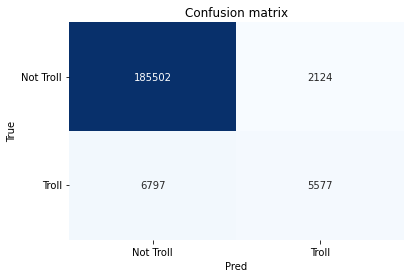

In [ ]:
cw = {
    0: 0.4,
    1: 0.4
}
lr = LogisticRegression(class_weight=cw,max_iter=1000,n_jobs=-1,verbose=1)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

In [ ]:
lr.n_iter_

array([380], dtype=int32)

[[272341   9098]
 [  6190  12371]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97    281439
           1       0.58      0.67      0.62     18561

    accuracy                           0.95    300000
   macro avg       0.78      0.82      0.80    300000
weighted avg       0.95      0.95      0.95    300000



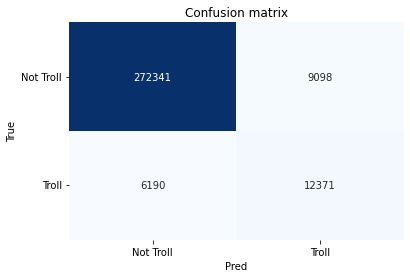

In [ ]:
lr = LogisticRegression(penalty='l2',class_weight='balanced',max_iter=1000)
lr.fit(X_oversample,y_oversample)
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

In [ ]:
lr = LogisticRegression(class_weight='balanced',max_iter=1000)
lr.fit(X_train_smote,y_train_smote)
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

NameError: ignored

In [ ]:
test_predict(df_test,lr,vectorize)

In [ ]:
lr = LogisticRegression(penalty='l2',class_weight='balanced',max_iter=2000)
lr.fit(X_undersample,y_undersample)
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

NameError: ignored

no preprocess + CountVectorizer 1-3 ngram 

[[182519   5107]
 [  4207   8167]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98    187626
           1       0.62      0.66      0.64     12374

    accuracy                           0.95    200000
   macro avg       0.80      0.82      0.81    200000
weighted avg       0.96      0.95      0.95    200000



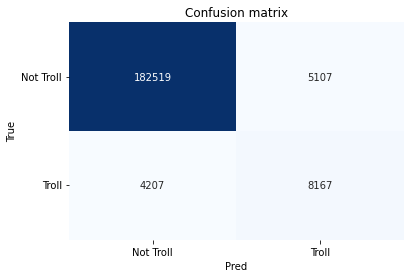

In [ ]:
lr = LogisticRegression(penalty='l2',class_weight='balanced',max_iter=1000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

tf-idf + no pre-proc 

In [ ]:
lr = LogisticRegression(penalty='l2',class_weight='balanced',max_iter=1000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

[[167896  19730]
 [  1388  10986]]


NameError: ignored

              precision    recall  f1-score   support

           0       0.99      0.89      0.94    187626
           1       0.36      0.89      0.51     12374

    accuracy                           0.89    200000
   macro avg       0.67      0.89      0.73    200000
weighted avg       0.95      0.89      0.91    200000



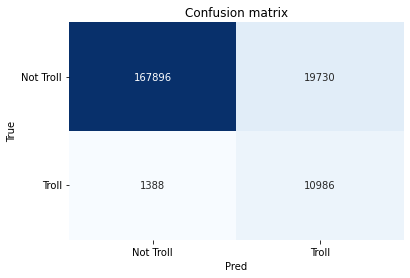

In [ ]:
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

Word2vec + LR 

[[156771  30855]
 [  2019  10355]]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91    187626
           1       0.25      0.84      0.39     12374

    accuracy                           0.84    200000
   macro avg       0.62      0.84      0.65    200000
weighted avg       0.94      0.84      0.87    200000



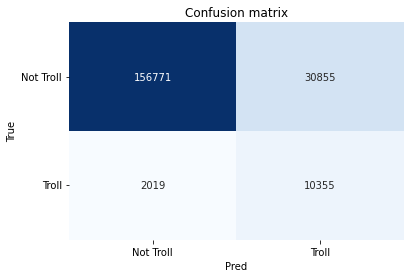

In [ ]:
lr = LogisticRegression(penalty='l2',class_weight='balanced',max_iter=1000)
lr.fit(X_train_vect_avg,y_train)
y_pred = lr.predict(X_test_vect_avg)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

Full Train set used 

In [ ]:
X

0         What are interesting facts about Microsoft his...
1         What are those things which are not gonna happ...
2         What should I know to avoid being "upsold" whe...
3                  How I add any account with payment bank?
4         Which Multi level marketing products are actua...
                                ...                        
999995                           How is CSE at VIT Chennai?
999996    How can we prevent a holocaust by robots, AI, ...
999997    How can I help a student remember key steps an...
999998    What is the difference between lace closure & ...
999999     What happens when you look into a broken mirror?
Name: question_text, Length: 1000000, dtype: object

In [ ]:
vectorize = CountVectorizer(ngram_range=(1,4))
X = vectorize.fit_transform(X)
lr = LogisticRegression(penalty='l2',class_weight={1:0.4,0:0.4},max_iter=1000)
lr.fit(X,Y)
final = vectorize.transform(df_test['question_text'])
y_pred = clf.predict(final)
y_pred = pd.DataFrame(y_pred, columns=['target'])
submission = pd.concat([df_test, y_pred], axis = 1).drop(columns=['question_text'])
submission.to_csv('submission_LR_fulldata.csv', index=False)  

### Randomised CV

In [ ]:
lr = LogisticRegression( max_iter=1000,  random_state=42)
solver = ['lbfgs', 'newton-cg', 'liblinear']
# warm_start = [True, False]
C = np.arange(0, 1, 0.01)
random_grid ={
    
    # 'warm_start' : warm_start,
    'solver' : solver,
    'C' : C,
}
random_cv = RandomizedSearchCV(lr, param_distributions=random_grid, scoring='f1',random_state=42,verbose=1)
random_cv.fit(X_train,y_train)
y_pred = random_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
random_cv.best_params_

NameError: ignored

# Perceptron 
We will apply cross-validation with hyper-parameter tuning so that we can use regularisation and also weights parameter which can help us to handle the imbalanced dataset 

[[  1828 279611]
 [     4  18557]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.01    281439
           1       0.06      1.00      0.12     18561

    accuracy                           0.07    300000
   macro avg       0.53      0.50      0.07    300000
weighted avg       0.94      0.07      0.02    300000



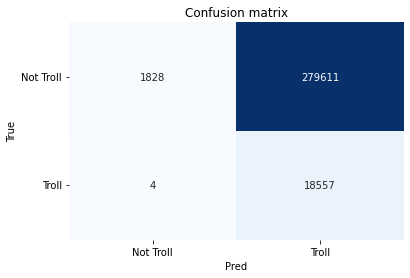

In [ ]:
ptron = Perceptron(class_weight="balanced",random_state=42)
param = [{
    'penalty':['l2','l1','elasticnet'],
    'alpha':[0.0001,0.001,0.01,0.1,1,5],
    
}]
grid_cv = GridSearchCV(ptron,param,scoring="f1")
grid_cv.fit(X_train,y_train)
y_pred = grid_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

In [ ]:
grid_cv.best_params_

[[     0 281439]
 [     0  18561]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    281439
           1       0.06      1.00      0.12     18561

    accuracy                           0.06    300000
   macro avg       0.03      0.50      0.06    300000
weighted avg       0.00      0.06      0.01    300000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


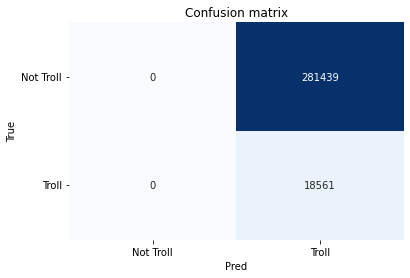

In [ ]:
ptron = Perceptron(class_weight="balanced",random_state=42)
distributions = dict(alpha=uniform(loc=0, scale=10),penalty=['l2', 'l1'])
random_cv = RandomizedSearchCV(ptron, distributions, random_state=0)
random_cv.fit(X_train,y_train)
y_pred = random_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

In [ ]:
random_cv.best_params_

{'alpha': 0.5671297731744318, 'penalty': 'l2'}

[[271880   9559]
 [  8212  10349]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    281439
           1       0.52      0.56      0.54     18561

    accuracy                           0.94    300000
   macro avg       0.75      0.76      0.75    300000
weighted avg       0.94      0.94      0.94    300000



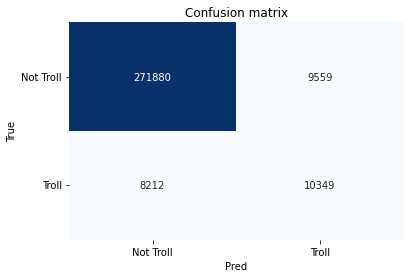

In [ ]:
ptron = Perceptron(class_weight="balanced",random_state=42, penalty='l2')
ptron.fit(X_train,y_train)
y_pred = ptron.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

## Ensemble Models
We try the following Ensemble Models:<br/>
GradientBoosting<br/>
XGBoost

[[280488    951]
 [ 16096   2465]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    281439
           1       0.72      0.13      0.22     18561

    accuracy                           0.94    300000
   macro avg       0.83      0.56      0.60    300000
weighted avg       0.93      0.94      0.92    300000



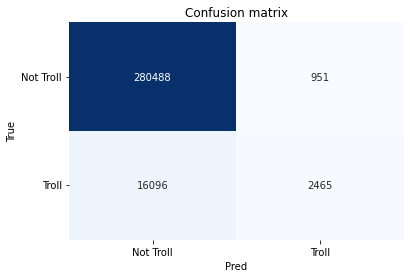

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

XGBoost:


[[280764    675]
 [ 16698   1863]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    281439
           1       0.73      0.10      0.18     18561

    accuracy                           0.94    300000
   macro avg       0.84      0.55      0.57    300000
weighted avg       0.93      0.94      0.92    300000



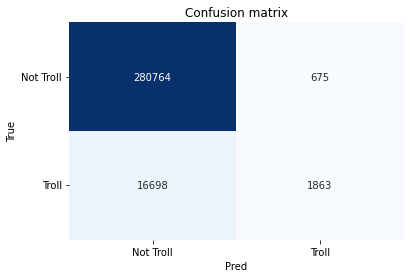

In [ ]:
classifier = XGBClassifier()
classifier.set_param({"predictor": "gpu_predictor"})
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

# Random Forest

In [ ]:
rnd_forest = RandomForestClassifier()
rnd_forest.fit(X_train, y_train)
y_train_test_pred = rnd_forest.predict(X_test)
print(y_train_test_pred)
cm = confusion_matrix(y_test, y_train_test_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_train_test_pred))

KeyboardInterrupt: ignored

In [ ]:
test_predict(df_test,lr,vectorize)

In [ ]:
rnd_forest = RandomForestClassifier(criterion='entropy')
rnd_forest.fit(X_train, y_train)
y_train_test_pred = rnd_forest.predict(X_test)
print(y_train_test_pred)
cm = confusion_matrix(y_test, y_train_test_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_train_test_pred))

# Support Vector Classifier 
### Undersamped Dataset

[[250501  30938]
 [  2680  15881]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94    281439
           1       0.34      0.86      0.49     18561

    accuracy                           0.89    300000
   macro avg       0.66      0.87      0.71    300000
weighted avg       0.95      0.89      0.91    300000



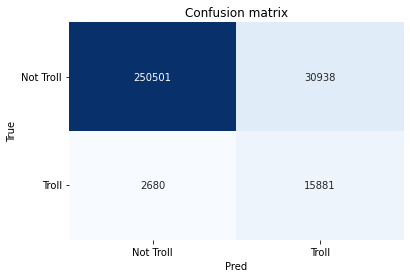

In [ ]:
svc_clf = svm.SVC(class_weight='balanced',kernel='linear')
svc_clf.fit(X_undersample, y_undersample)
y_train_test_pred = svc_clf.predict(X_test)
cm = confusion_matrix(y_test, y_train_test_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_train_test_pred))

### Normal Data

[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[[ 99065 182374]
 [  8668   9893]]
              precision    recall  f1-score   support

           0       0.92      0.35      0.51    281439
           1       0.05      0.53      0.09     18561

    accuracy                           0.36    300000
   macro avg       0.49      0.44      0.30    300000
weighted avg       0.87      0.36      0.48    300000



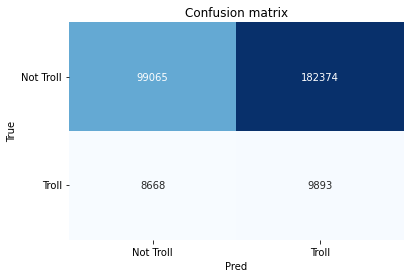

In [ ]:
svc_clf = svm.SVC(class_weight='balanced',kernel='linear',verbose=True,max_iter=5000,cache_size=2000)

svc_clf.fit(X_train, y_train)
y_train_test_pred = svc_clf.predict(X_test)
cm = confusion_matrix(y_test, y_train_test_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_train_test_pred))

In [ ]:
svc_clf.n_features_in_

2049382

In [ ]:
pickle.dump(svc_clf, open('svc_normal_clf.pkl', 'wb'))

### SGDClassifier

In [ ]:
sgdc_svc_clf = SGDClassifier(loss='hinge', penalty='l2', alpha=0.000001, max_iter=1000, tol=0.00001, warm_start=True)

[[275724   5715]
 [  9066   9495]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97    281439
           1       0.62      0.51      0.56     18561

    accuracy                           0.95    300000
   macro avg       0.80      0.75      0.77    300000
weighted avg       0.95      0.95      0.95    300000



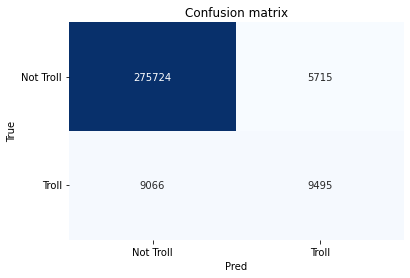

In [ ]:
sgdc_svc_clf.fit(X_train, y_train)
y_train_test_pred = sgdc_svc_clf.predict(X_test)
cm = confusion_matrix(y_test, y_train_test_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_train_test_pred))

[[246386  35053]
 [  2324  16237]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    281439
           1       0.32      0.87      0.46     18561

    accuracy                           0.88    300000
   macro avg       0.65      0.88      0.70    300000
weighted avg       0.95      0.88      0.90    300000



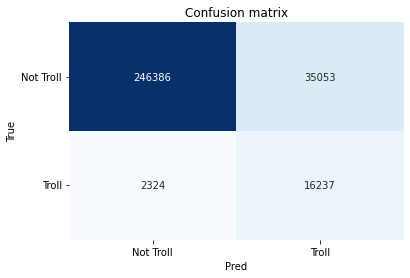

In [ ]:
sgdc_svc_clf.fit(X_undersample, y_undersample)
y_train_test_pred = sgdc_svc_clf.predict(X_test)
cm = confusion_matrix(y_test, y_train_test_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_train_test_pred))

[[275130   6309]
 [  8916   9645]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97    281439
           1       0.60      0.52      0.56     18561

    accuracy                           0.95    300000
   macro avg       0.79      0.75      0.77    300000
weighted avg       0.95      0.95      0.95    300000



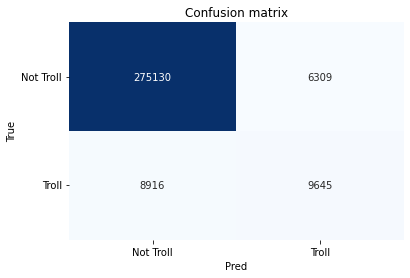

In [ ]:
sgdc_svc_clf.fit(X_oversample, y_oversample)
y_train_test_pred = sgdc_svc_clf.predict(X_test)
cm = confusion_matrix(y_test, y_train_test_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_train_test_pred))

In [ ]:
sgdc_svc_clf.n_iter_

135

In [ ]:
test_predict(df_test,sgdc_svc_clf,vectorize)

# Final Week Trails

# Attempt 1
Count vectorizer with threshold probabilities and fit transform over train and test df


In [ ]:
import random
import numpy as np 
import pandas as pd
import seaborn as sns

In [ ]:
train_df = pd.read_csv("https://raw.githubusercontent.com/MnCSSJ4x/Yahoo-Troll-Detection-Challenge/main/train_df.csv?token=GHSAT0AAAAAABWVIX4OHL75KBJ6P735MPLKYZ2PMPQ")
test_df = pd.read_csv("https://raw.githubusercontent.com/MnCSSJ4x/Yahoo-Troll-Detection-Challenge/main/test_df.csv?token=GHSAT0AAAAAABWVIX4O5BQNJC6JE6FK77YWYZ2PMNQ")

In [ ]:
complete_df = pd.concat([train_df, test_df])
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range = (1,4))
features = vectorizer.fit_transform(complete_df['question_text'])

In [ ]:
from sklearn.linear_model import LogisticRegression
train_data = vectorizer.transform(train_df['question_text'])
test_data = vectorizer.transform(test_df['question_text'])
model = LogisticRegression(class_weight={0:0.4,1:0.4},max_iter=1500, solver='lbfgs', penalty = 'l2')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
x_train, x_valid, y_train, y_valid = train_test_split(train_data, main_df['target'], test_size=0.01, random_state=43)
model.fit(x_train, y_train)
test_pred_prob = model.predict_proba(test_data)[:, 1]
y_test_pred = (test_pred_prob > 0.2).astype(np.int)
test_df['target'] = y_test_pred
test_df.drop(['question_text'], axis = 'columns', inplace=True)
test_df.to_csv("LR_fulldata.csv", index = False)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


# Attempt 3

In [ ]:
df_train = pd.read_csv("https://raw.githubusercontent.com/MnCSSJ4x/Yahoo-Troll-Detection-Challenge/main/train_df.csv?token=GHSAT0AAAAAABWVIX4OHL75KBJ6P735MPLKYZ2PMPQ")
df_test = pd.read_csv("https://raw.githubusercontent.com/MnCSSJ4x/Yahoo-Troll-Detection-Challenge/main/test_df.csv?token=GHSAT0AAAAAABWVIX4O5BQNJC6JE6FK77YWYZ2PMNQ")
# df_test = pd.read_csv("https://raw.githubusercontent.com/KMishra23/mlprojectdata/main/test_lemmatised_preprocess.csv")

Applying all the preprocessing defined in part 1 

In [ ]:
preprocessor_train = Preprocessor(df_train)
processed_df  = preprocessor_train.preprocess()

We will export this preprocessed dataset and store locally for the ease of working for the 2 members. 

In [ ]:
X = processed_df['question_text']
Y = processed_df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.01, random_state=43)

### TF-IDF Vectorizer

In [ ]:
# complete_df = pd.concat([X_train,X_test])

vectorize = TfidfVectorizer(ngram_range=(1,3),lowercase=False, analyzer="char",strip_accents = 'unicode', max_df = 0.8,
    max_features = 150000)
# cdf_char = vectorize.fit_transform(complete_df)
X_train1 = vectorize.fit_transform(X_train.values.astype('U'))
X_test1 = vectorize.transform(X_test.values.astype('U'))


vectorizer2 = TfidfVectorizer(ngram_range=(1,3),lowercase=False, analyzer="word",strip_accents = 'unicode', max_df = 0.8,
    max_features = 150000)
# cdf_word = vectorizer2.fit_transform(complete_df)
X_train2 = vectorizer2.fit_transform(X_train.values.astype('U'))
X_test2 = vectorizer2.transform(X_test.values.astype('U'))

In [ ]:
from scipy.sparse import hstack
X_train_final = hstack((X_train1, X_train2)).tocsr()
X_test_final = hstack((X_test1, X_test2)).tocsr()
X_train = X_train_final
X_test = X_test_final

In [ ]:
lr = LogisticRegression(class_weight={0:1,1:2},max_iter=300,verbose=1)
lr.fit(X_train,y_train)
y_pred_proba = lr.predict_proba(X_test)[:,1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       274015     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99906D+05    |proj g|=  3.10271D+05


 This problem is unconstrained.



At iterate   50    f=  1.46842D+05    |proj g|=  1.34668D+03

At iterate  100    f=  1.35739D+05    |proj g|=  5.20215D+02

At iterate  150    f=  1.34487D+05    |proj g|=  9.16032D+02

At iterate  200    f=  1.34299D+05    |proj g|=  5.89201D+01

At iterate  250    f=  1.34287D+05    |proj g|=  2.30605D+01

At iterate  300    f=  1.34286D+05    |proj g|=  5.38597D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    300    350      1     0     0   5.386D-01   1.343D+05
  F =   134285.57978315308     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.5min finished


In [ ]:
# y_pred_proba = loaded_model.predict_proba(X_test)[:,1]

[[9128  237]
 [ 205  430]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      9365
           1       0.64      0.68      0.66       635

    accuracy                           0.96     10000
   macro avg       0.81      0.83      0.82     10000
weighted avg       0.96      0.96      0.96     10000



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


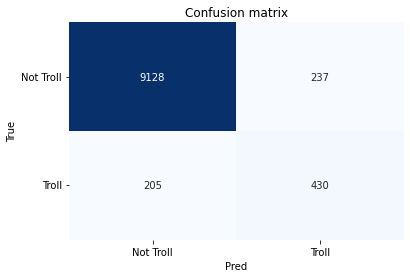

In [ ]:
y_pred = (y_pred_proba > 0.45).astype(np.int)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm)
print(classification_report(y_test, y_pred))

In [ ]:
y_test = y_test.to_numpy()

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred 

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
index = []
for i in range(len(y_pred)):
    if(y_pred[i]==1 and y_test[i]==0):
        index.append(i) 


In [ ]:
index

[9,
 10,
 30,
 38,
 69,
 133,
 152,
 170,
 186,
 268,
 289,
 299,
 326,
 369,
 484,
 515,
 518,
 558,
 615,
 631,
 697,
 704,
 715,
 820,
 827,
 866,
 889,
 907,
 936,
 941,
 995,
 1002,
 1019,
 1035,
 1088,
 1097,
 1138,
 1144,
 1147,
 1174,
 1236,
 1352,
 1362,
 1544,
 1560,
 1569,
 1581,
 1592,
 1596,
 1632,
 1686,
 1749,
 1808,
 1857,
 1865,
 1875,
 1912,
 1923,
 1939,
 1959,
 1970,
 2036,
 2085,
 2128,
 2168,
 2203,
 2218,
 2238,
 2263,
 2329,
 2364,
 2383,
 2438,
 2466,
 2480,
 2495,
 2497,
 2542,
 2564,
 2570,
 2603,
 2627,
 2638,
 2651,
 2690,
 2770,
 2808,
 2829,
 2838,
 2847,
 2874,
 2884,
 2928,
 2935,
 2968,
 2995,
 3067,
 3079,
 3185,
 3192,
 3236,
 3293,
 3296,
 3340,
 3342,
 3364,
 3379,
 3389,
 3416,
 3422,
 3470,
 3472,
 3519,
 3550,
 3566,
 3583,
 3600,
 3641,
 3845,
 3939,
 3984,
 3994,
 4011,
 4021,
 4029,
 4058,
 4118,
 4139,
 4210,
 4249,
 4275,
 4302,
 4350,
 4402,
 4436,
 4460,
 4495,
 4514,
 4560,
 4624,
 4708,
 4786,
 4875,
 4904,
 4943,
 4952,
 4960,
 4965,
 

In [ ]:
idx = index[189]

In [ ]:
X_test_mod = pd.DataFrame(X_test)
X_test_mod.reset_index(inplace=True)
X_test_mod.drop(labels=['index'],axis=1,inplace=True)

In [ ]:
X_test_mod = X_test_mod['question_text']

In [ ]:
X_test_mod[9]

'Will Donald Trump take the US into a war with North Korea?'

In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin
class Transformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, x, y=None):
        return self
    def transform(self, doc):
        r1 = vectorize.transform(doc)
        r2 = vectorizer2.transform(doc)
        return hstack((r1, r2)).tocsr()

# Lime Analysis

In [ ]:
#https://towardsdatascience.com/explain-nlp-models-with-lime-shap-5c5a9f84d59b
import lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline
c = make_pipeline(Transformer(), lr)
class_names=list(df_train.target.unique())
explainer = LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(X_test_mod[idx], c.predict_proba, num_features=6, top_labels=4)
print(exp.available_labels())
print('Predicted ',y_pred[idx],' Actual: ',y_test[idx])
exp.show_in_notebook(text=True)


[0, 1]
Predicted  1  Actual:  0


In [ ]:
# preprocessor_train = Preprocessor(df_test)
# processed_df  = preprocessor_train.preprocess()
# X = processed_df['question_text']
# df_test = df_test.dropna()
X_final = df_test['question_text'].values.astype('U')
X_1_final = vectorize.transform(X_final)
X_2_final = vectorizer2.transform(X_final)
X_final = hstack((X_1_final, X_2_final)).tocsr()
y_pred_proba_fin = lr.predict_proba(X_final)[:,1]
y_pred_fin = (y_pred_proba_fin > 0.45).astype(np.int)
y_pred_fin = pd.DataFrame(y_pred_fin, columns=['target'])
submission = pd.concat([df_test, y_pred_fin], axis = 1).drop(columns=['question_text'])
submission.to_csv('submission_LR.csv', index=False)  

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# from sklearn.model_selection import StratifiedKFold
# kf = StratifiedKFold(n_splits=5,shuffle=True)
# pred_test_full =0
# cv_score =[]
# i=1
# for train_index,test_index in kf.split(X,Y):
#     print('{} of KFold {}'.format(i,kf.n_splits))
#     X_train,X_test = X.loc[train_index],X.loc[test_index]
#     y_train,y_test = Y.loc[train_index],Y.loc[test_index]
#     vectorize = TfidfVectorizer(ngram_range=(1,3),lowercase=False, analyzer="char",max_df=0.9,strip_accents = 'unicode')
#     X_train1 = vectorize.fit_transform(X_train)
#     X_test1 = vectorize.transform(X_test)
#     vectorizer2 = TfidfVectorizer(ngram_range=(1,3),lowercase=False, analyzer="word", max_df=0.9,strip_accents = 'unicode')
#     X_train2 = vectorizer2.fit_transform(X_train)
#     X_test2 = vectorizer2.transform(X_test)
#     from scipy.sparse import hstack
#     X_train_final = hstack((X_train1, X_train2)).tocsr()
#     X_test_final = hstack((X_test1, X_test2)).tocsr()
#     X_train = X_train_final
#     X_test = X_test_final
    
#     #model
#     lr = LogisticRegression(class_weight='balanced',max_iter=500, solver='lbfgs', dual=False)
#     lr.fit(X_train,y_train)
#     y_pred = lr.predict(X_test)
#     score = classification_report(y_test,y_pred)
#     print('f1',score)
#     cv_score.append(score)    
#     pred_test = lr.predict_proba(X_test)[:,1]
#     pred_test_full +=pred_test
#     i+=1

# Attempt 2: Bayes Transformation and Logistic Regression

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import string

In [ ]:
class NBTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, alpha=1):
        self.r = None
        self.alpha = alpha

    def fit(self, X, y):
        # store smoothed log count ratio
        p = self.alpha + X[y==1].sum(0)
        q = self.alpha + X[y==0].sum(0)
        self.r = csr_matrix(np.log(
            (p / (self.alpha + (y==1).sum())) /
            (q / (self.alpha + (y==0).sum()))
        ))
        return self

    def transform(self, X, y=None):
        return X.multiply(self.r)

In [ ]:
df_train = pd.read_csv("https://raw.githubusercontent.com/MnCSSJ4x/Yahoo-Troll-Detection-Challenge/main/train_df.csv?token=GHSAT0AAAAAABWVIX4OHL75KBJ6P735MPLKYZ2PMPQ")
df_test = pd.read_csv("https://raw.githubusercontent.com/MnCSSJ4x/Yahoo-Troll-Detection-Challenge/main/test_df.csv?token=GHSAT0AAAAAABWVIX4O5BQNJC6JE6FK77YWYZ2PMNQ")

In [ ]:
TOKENIZER = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(text):
    '''
    spacing punctuations
    '''
    # r' \1 ' - group 1 
    return TOKENIZER.sub(r' \1 ', text).split()

In [ ]:
tfidf_vectorizer = TfidfVectorizer(
                    ngram_range=(1,4),
                    tokenizer=tokenize,
                    min_df=3,
                    max_df=0.9,
                    strip_accents='unicode',
                    use_idf=True,
                    smooth_idf=True,
                    sublinear_tf=True).fit(pd.concat([df_train['question_text'], df_test['question_text']]))
X = tfidf_vectorizer.transform(df_train['question_text'])
X_test = tfidf_vectorizer.transform(df_test['question_text'])
y = df_train.target.values

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
nb_transformer = NBTransformer(alpha=1).fit(X, y)
X_nb = nb_transformer.transform(X)
X_test_nb = nb_transformer.transform(X_test)

In [ ]:
model = LogisticRegression(solver='lbfgs', dual=False, class_weight='balanced', C=0.5, max_iter=300)
model.fit(X_nb, y)
pred_test_y = model.predict_proba(X_test_nb)[:,1]
pred_test_y = (pred_test_y>0.7).astype(int)
out_df = pd.DataFrame({"qid":df_test['qid'].values})
out_df['target'] = pred_test_y 
out_df.to_csv("submission.csv", index=False)

In [ ]:
model.n_iter_

array([240], dtype=int32)